In [61]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

In [5]:
import yfinance as yf

In [9]:
# Get Tesla stock data
tesla = yf.Ticker("TSLA")

# Download historical stock data
data = tesla.history(period="max")  # Example: last 1 year of data
print(data.head())  # View the first few rows


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


2. Extracting Tesla Revenue data using Webscapping


In [12]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [24]:
html_data = requests.get(url).text

In [121]:
soup = BeautifulSoup(html_data, 'html5lib')

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = soup.find("table")  # find the first table element
for row in table.find_all("tr"):  # iterate over all rows
    col = row.find_all("td")
    if col:  # ensure that the row has columns
        date = col[0].text.strip()
        revenue = col[1].text.strip()
        # Create a temporary DataFrame for the row
        temp_df = pd.DataFrame({"Date": [date], "Revenue": [revenue]})

# Use pd.concat to append the new row to the DataFrame
        tesla_revenue = pd.concat([tesla_revenue, temp_df], ignore_index=True)

tesla_revenue.tail()

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


3.Extracting GameStop Stock Data Using yfinance - 2 Points

In [27]:
GameStop = yf.Ticker("GME")

In [33]:
gme_data = GameStop.history(period="max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-02 00:00:00-05:00,28.959999,29.370001,26.750000,27.270000,13576600,0.0,0.0
2024-12-03 00:00:00-05:00,26.549999,27.590000,26.490000,27.440001,6009900,0.0,0.0
2024-12-04 00:00:00-05:00,27.070000,27.830000,26.629999,27.030001,6387500,0.0,0.0


In [69]:
soup = BeautifulSoup(html_data, 'html5lib')

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = soup.find("table")  # find the first table element
for row in table.find_all("tr"):  # iterate over all rows
    col = row.find_all("td")
    if col:  # ensure that the row has columns
        date = col[0].text.strip()
        revenue = col[1].text.strip()
        # Create a temporary DataFrame for the row
        temp_df = pd.DataFrame({"Date": [date], "Revenue": [revenue]})

# Use pd.concat to append the new row to the DataFrame
        tesla_revenue = pd.concat([tesla_revenue, temp_df], ignore_index=True)

print(tesla_revenue)

    Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


5 Tesla Stock and Revenue Dashboard


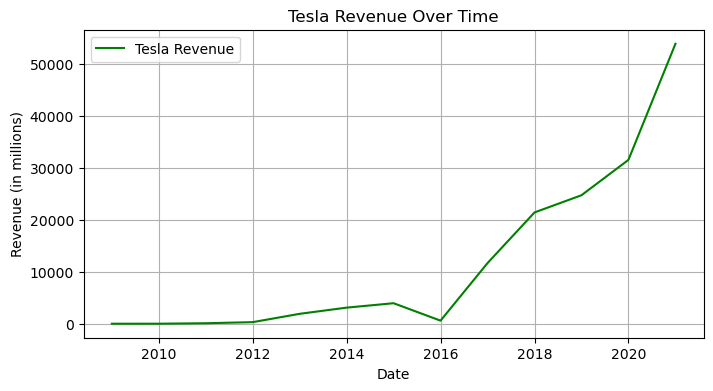

In [81]:
# Define the make_graph function
def make_graph(data, revenue, tesla_revenue):
    # Ensure 'Date' columns are in datetime format
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    
    # Clean the 'Revenue' column: Remove $ and commas, then convert to numeric
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)

    # Sort data by date
    tesla_revenue = tesla_revenue.sort_values(by='Date')
    # Plot the revenue data
    plt.figure(figsize=(8, 4))
    plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], label=f"{data} Revenue", color='green')
    
    # Add titles and labels
    plt.title(f"{data} Revenue Over Time")
    plt.xlabel('Date')
    plt.ylabel('Revenue (in millions)')
    plt.legend()
    plt.grid(True)
    plt.show()
tesla_revenue = pd.DataFrame({"Date": ["2009","2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"],
                             "Revenue": ["112", "117", "204", "413", "2013", "3198", "4046", "700", "11759", "21461", "24758", "31536", "53823"]})
make_graph("Tesla", "Revenue", tesla_revenue)

In [65]:
print(type(tesla_revenue))

<class 'pandas.core.frame.DataFrame'>


In [67]:
#make_graph("Tesla", "Revenue", tesla_revenue)

4 Extracting GameStop Revenue Data using Webscraping

In [91]:
url1=" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [125]:
html_data2 = requests.get(url1).text

In [101]:
soup = BeautifulSoup(html_data, 'html5lib')

In [123]:
tables = pd.read_html(url1)
gme_revenue = tables[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

print(gme_revenue)
gme_revenue.tail()

                            Date  Revenue
0  1970-01-01 00:00:00.000002020   6466.0
1  1970-01-01 00:00:00.000002019   8285.0
2  1970-01-01 00:00:00.000002018   8547.0
3  1970-01-01 00:00:00.000002017   7965.0
4  1970-01-01 00:00:00.000002016   9364.0
5  1970-01-01 00:00:00.000002015   9296.0
6  1970-01-01 00:00:00.000002014   9040.0
7  1970-01-01 00:00:00.000002013   8887.0
8  1970-01-01 00:00:00.000002012   9551.0
9  1970-01-01 00:00:00.000002011   9474.0
10 1970-01-01 00:00:00.000002010   9078.0
11 1970-01-01 00:00:00.000002009   8806.0
12 1970-01-01 00:00:00.000002008   7094.0
13 1970-01-01 00:00:00.000002007   5319.0
14 1970-01-01 00:00:00.000002006   3092.0
15 1970-01-01 00:00:00.000002005   1843.0


,Date,Revenue
11,1970-01-01 00:00:00.000002009,8806.0
12,1970-01-01 00:00:00.000002008,7094.0
13,1970-01-01 00:00:00.000002007,5319.0
14,1970-01-01 00:00:00.000002006,3092.0
15,1970-01-01 00:00:00.000002005,1843.0


In [111]:
def get_gamestop_revenue():
    # URL of the webpage containing revenue data
    url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"  # Replace with the actual URL
    
    # Fetch webpage content
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Locate and parse the revenue table (adjust selectors as needed)
    table = soup.find("table")
    rows = table.find_all("tr")
    data = []
    for row in rows:
        cols = row.find_all("td")
        cols = [col.text.strip() for col in cols]
        if cols:  # Skip empty rows
            data.append(cols)
    
    # Create a DataFrame
    revenue_df = pd.DataFrame(data, columns=["Date", "Revenue"])
    revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])
    revenue_df['Revenue'] = revenue_df['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)
    return revenue_df

In [115]:
pip install dash


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.8 MB 2.6 MB/s eta 0:00:03
    --------------------------------------- 0.2/7.8 MB 2.2 MB/s eta 0:00:04
   - -------------------------------------- 0.3/7.8 MB 2.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/7.8 MB 2.9 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/7.8 MB 2.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/7.8 MB 2.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/7.8 MB 2.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/7.8 MB 3.1 MB/s eta 0:00:03
   ------- -------------------------------- 1.5/7.8 MB 3.7 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.8 MB 4.0 MB/s eta 0:00:02
   --------- ------------------------------ 1.9/7.8 MB 3.8 MB/s eta 0:00:02
   ----------- ---------------------------- 2.2/7.8 MB 4.0 MB/s eta 0:00:02
   ----------- ----

In [117]:
import dash
from dash import dcc, html
import plotly.graph_objs as go

# Fetch data
stock_data = get_gamestop_stock()
revenue_data = get_gamestop_revenue()

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("GameStop Stock and Revenue Dashboard", style={'textAlign': 'center'}),
    
    # Stock Price Graph
    html.Div([
        dcc.Graph(
            id='stock-graph',
            figure={
                'data': [
                    go.Scatter(x=stock_data['Date'], y=stock_data['Close'], mode='lines', name='Stock Price')
                ],
                'layout': go.Layout(
                    title='GameStop Stock Price Over Time',
                    xaxis={'title': 'Date'},
                    yaxis={'title': 'Stock Price (USD)'},
                    template='plotly_dark'
                )
            }
        )
    ]),
    
    # Revenue Graph
    html.Div([
        dcc.Graph(
            id='revenue-graph',
            figure={
                'data': [
                    go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], mode='lines+markers', name='Revenue')
                ],
                'layout': go.Layout(
                    title='GameStop Revenue Over Time',
                    xaxis={'title': 'Date'},
                    yaxis={'title': 'Revenue (USD)'},
                    template='plotly_dark'
                )
            }
        )
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)